# Energy Efficiency Analysis using Regression methods

The goal of this project is to assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters. The dataset and associated information is obtained from the below link :

https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#

The data is obtained by performing energy analysis using 12 different building shapes simulated in Ecotect.The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. Various settings were simulated as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses i.e Heating Load and Cooling Load. 

This project analysis is done in R. Various regression methods are used and compared against their error metrics.The analysis involves the following :
    1. Data Visualization and Preprocessing
    2. Model building & Fitting Regression method to Data (Machine Learning stage)
    3. Model Evaluation (Making Predictions)

Lets first try to fit a Linear Regression to the data. Begin by loading libraries for this project

In [1]:
# Load the libraries
library(readxl)
library(ggplot2)
library(caTools)
library(gridExtra)

In [2]:
# Read the dataset into the varaible Energyefficiency
Energyefficiency <- read_excel("ENB2012.xlsx",col_names = TRUE)

In [3]:
Energyefficiency
dim(Energyefficiency)

X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,
0.98,514.5,294.0,110.25,7.0,2,0,0,15.55,21.33,NA
0.98,514.5,294.0,110.25,7.0,3,0,0,15.55,21.33,NA
0.98,514.5,294.0,110.25,7.0,4,0,0,15.55,21.33,NA
0.98,514.5,294.0,110.25,7.0,5,0,0,15.55,21.33,NA
0.90,563.5,318.5,122.50,7.0,2,0,0,20.84,28.28,NA
0.90,563.5,318.5,122.50,7.0,3,0,0,21.46,25.38,NA
0.90,563.5,318.5,122.50,7.0,4,0,0,20.71,25.16,NA
0.90,563.5,318.5,122.50,7.0,5,0,0,19.68,29.60,NA
0.86,588.0,294.0,147.00,7.0,2,0,0,19.50,27.30,NA
0.86,588.0,294.0,147.00,7.0,3,0,0,19.95,21.97,NA


[1] 1296   11

## Data Preprocessing
The dataset has 1296 observations as rows and 11 columns. Observe that the last column and a few last rows contain all NA's. Lets remove them.


In [4]:
# Removing the column with NA's
Energyefficiency <- Energyefficiency[,-11]

In [5]:
# Removing all rows with NA's using complete.cases command
Energyefficiency <- Energyefficiency[complete.cases(Energyefficiency),]

In [6]:
Energyefficiency
dim(Energyefficiency)

X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0.98,514.5,294.0,110.25,7.0,2,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,3,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,4,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,5,0,0,15.55,21.33
0.90,563.5,318.5,122.50,7.0,2,0,0,20.84,28.28
0.90,563.5,318.5,122.50,7.0,3,0,0,21.46,25.38
0.90,563.5,318.5,122.50,7.0,4,0,0,20.71,25.16
0.90,563.5,318.5,122.50,7.0,5,0,0,19.68,29.60
0.86,588.0,294.0,147.00,7.0,2,0,0,19.50,27.30
0.86,588.0,294.0,147.00,7.0,3,0,0,19.95,21.97


[1] 768  10

All NA's are now removed. Lets now update the column names,

In [7]:
colnames(Energyefficiency) <- c("Relative.Compactness","Surface.Area","Wall.Area","Roof.Area",
                                "Overall.Height","Orientation","Glazing.Area","Glazing.Area.Distribution",
                                "Heating.Load","Cooling.Load") 

In [8]:
head(Energyefficiency)

Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


Lets now print the summary statistics

In [9]:
summary(Energyefficiency)

 Relative.Compactness  Surface.Area     Wall.Area       Roof.Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall.Height  Orientation    Glazing.Area    Glazing.Area.Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

Lets now eyeball scatterplots of Heating Load and Cooling Load as functions of ther features.

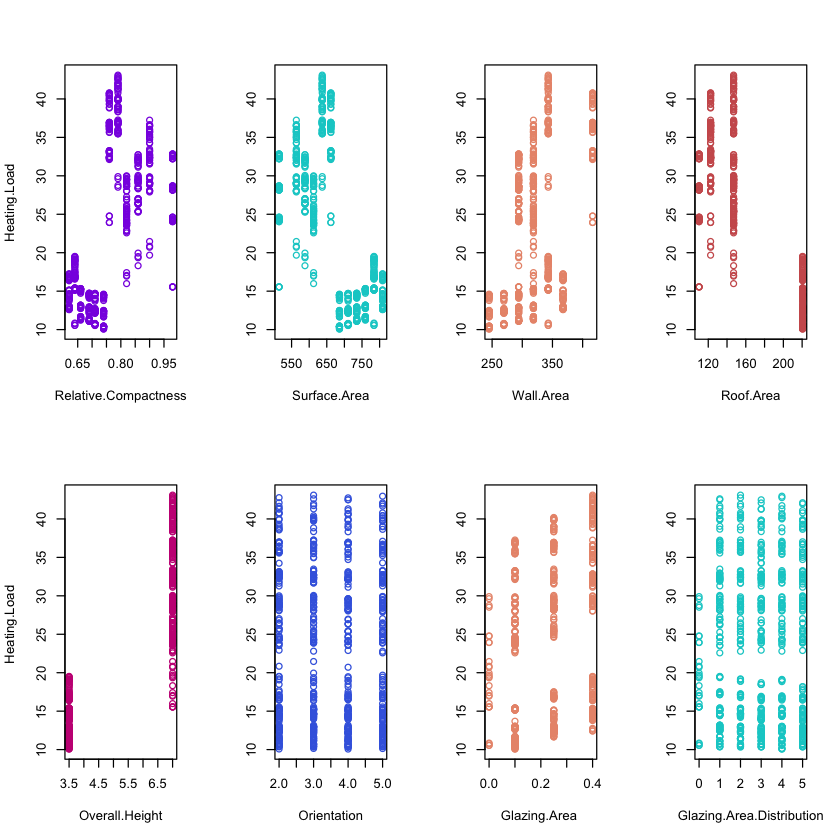

In [44]:
par(mfrow = c(2,4))
plot(Energyefficiency$Relative.Compactness, Energyefficiency$Heating.Load, xlab ="Relative.Compactness", ylab= "Heating.Load" , col ='blueviolet')
plot(Energyefficiency$Surface.Area, Energyefficiency$Heating.Load, xlab ="Surface.Area", ylab= " " ,col ='cyan3')
plot(Energyefficiency$Wall.Area, Energyefficiency$Heating.Load, xlab ="Wall.Area", ylab= " " ,col ='darksalmon')
plot(Energyefficiency$Roof.Area , Energyefficiency$Heating.Load, xlab ="Roof.Area", ylab= " " ,col ='indianred')
plot(Energyefficiency$Overall.Height, Energyefficiency$Heating.Load, xlab ="Overall.Height", ylab= "Heating.Load " ,col ='mediumvioletred')
plot(Energyefficiency$Orientation, Energyefficiency$Heating.Load, xlab ="Orientation", ylab= " " ,col ='royalblue')
plot(Energyefficiency$Glazing.Area, Energyefficiency$Heating.Load, xlab ="Glazing.Area ", ylab= " " ,col ='darksalmon')
plot(Energyefficiency$Glazing.Area.Distribution, Energyefficiency$Heating.Load, xlab ="Glazing.Area.Distribution", ylab= " " ,col ='cyan3')


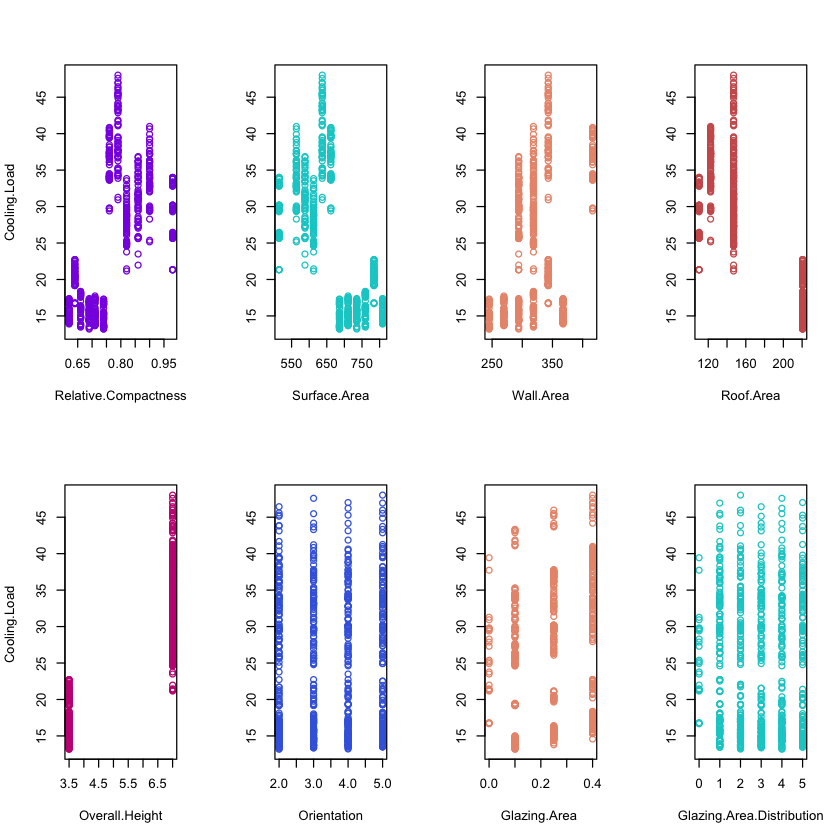

In [43]:
par(mfrow = c(2,4))
plot(Energyefficiency$Relative.Compactness, Energyefficiency$Cooling.Load, xlab ="Relative.Compactness", ylab= "Cooling.Load" , col ='blueviolet')
plot(Energyefficiency$Surface.Area, Energyefficiency$Cooling.Load, xlab ="Surface.Area", ylab= " " ,col ='cyan3')
plot(Energyefficiency$Wall.Area, Energyefficiency$Cooling.Load, xlab ="Wall.Area", ylab= " " ,col ='darksalmon')
plot(Energyefficiency$Roof.Area , Energyefficiency$Cooling.Load, xlab ="Roof.Area", ylab= " " ,col ='indianred')
plot(Energyefficiency$Overall.Height, Energyefficiency$Cooling.Load, xlab ="Overall.Height", ylab= "Cooling.Load " ,col ='mediumvioletred')
plot(Energyefficiency$Orientation, Energyefficiency$Cooling.Load, xlab ="Orientation", ylab= " " ,col ='royalblue')
plot(Energyefficiency$Glazing.Area, Energyefficiency$Cooling.Load, xlab ="Glazing.Area ", ylab= " " ,col ='darksalmon')
plot(Energyefficiency$Glazing.Area.Distribution, Energyefficiency$Cooling.Load, xlab ="Glazing.Area.Distribution", ylab= " " ,col ='cyan3')

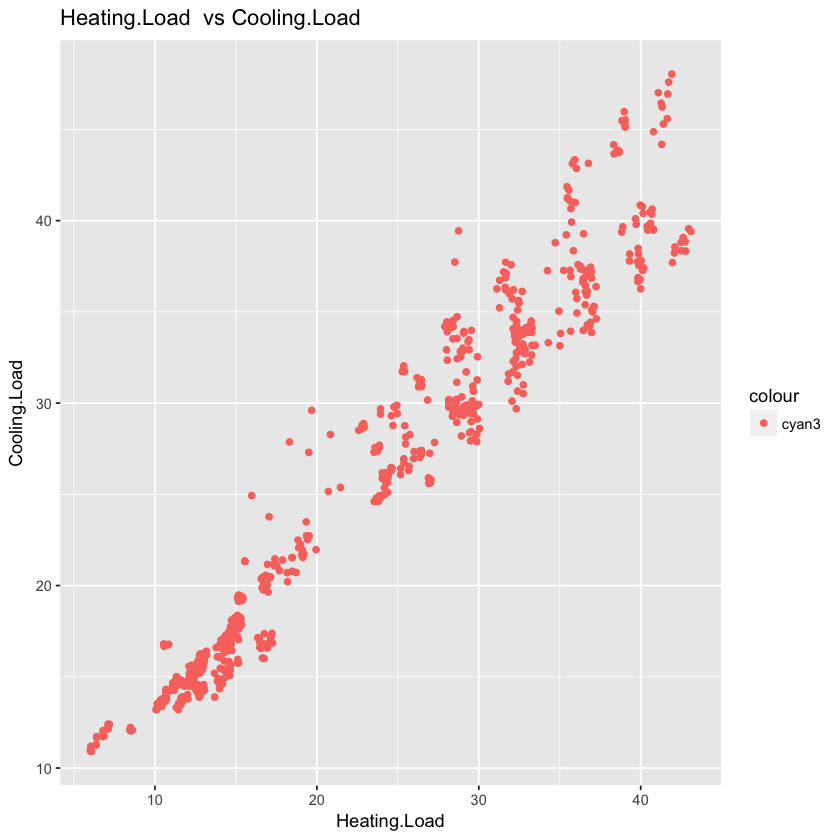

In [14]:
ggplot() +
  geom_point(aes(x = Energyefficiency$Heating.Load, y = Energyefficiency$Cooling.Load, color = 'cyan3'))+
  ggtitle('Heating.Load  vs Cooling.Load')+
  xlab('Heating.Load')+
  ylab('Cooling.Load')

From the plots, we infer the following:
1. Heating.Load and Cooling.Load do have some correlations, as is evident from their linear variation w.r.t each other
2. Most of the variables are discrete in nature, except Heating.Load and Cooling.Load.
3. No underlying patterns like nonlinearity is observed.

There are some outliers in the Heating.Load column for values less than 10. Lets remove them

In [15]:
#Removing Outliers in Heating Load
Energyefficiency <- Energyefficiency[Energyefficiency$Heating.Load >= 10,]


The dataset is now ready for analysis. Lets now split the dataset into training and test set

## Splitting to training and test sets

In [16]:
set.seed(123)
split <- sample.split(Energyefficiency$Heating.Load, SplitRatio = 0.8)
training_set <- subset(Energyefficiency, split == TRUE)
test_set <- subset(Energyefficiency, split == FALSE)

Lets do some feature scaling for ensuring uniformity,

In [17]:
# Feature Scaling
training_set <- data.frame(scale(training_set))
test_set <- data.frame(scale(test_set))

## Fitting a Linear Regression - Linear_regressor1

Lets now fit a Linear Regression to predict the output Heating.Load as a function of other features.

In [18]:
# Fitting Multiple Linear Regression to the Training set
Linear_regressor1 <- lm(formula = Heating.Load ~Relative.Compactness + Surface.Area + Wall.Area +
                          Roof.Area + Overall.Height + Orientation + Glazing.Area + Glazing.Area.Distribution,
                data = training_set)

In [19]:
#print summary statistics
summary(Linear_regressor1)


Call:
lm(formula = Heating.Load ~ Relative.Compactness + Surface.Area + 
    Wall.Area + Roof.Area + Overall.Height + Orientation + Glazing.Area + 
    Glazing.Area.Distribution, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9590 -0.1355 -0.0034  0.1325  0.7501 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -3.390e-16  1.216e-02   0.000    1.000    
Relative.Compactness      -7.191e-01  1.263e-01  -5.693 1.97e-08 ***
Surface.Area              -8.201e-01  1.751e-01  -4.685 3.48e-06 ***
Wall.Area                  2.738e-01  3.300e-02   8.296 7.34e-16 ***
Roof.Area                         NA         NA      NA       NA    
Overall.Height             7.195e-01  6.829e-02  10.537  < 2e-16 ***
Orientation                2.752e-03  1.218e-02   0.226    0.821    
Glazing.Area               2.497e-01  1.231e-02  20.281  < 2e-16 ***
Glazing.Area.Distribution  1

From these statistics, it is observed that Roof.Area creates singularities and Orientation and Glazing.area.Distribution may not be good predictors of the dependent variable, Heating.Load just because of their elevated p-values.  Lets now rebuild removing these predictors.

In [20]:
#Removing insignificant variables
Linear_regressor1 <- lm(formula = Heating.Load ~Relative.Compactness + Surface.Area + Wall.Area 
                + Overall.Height + Glazing.Area,
                data = training_set)
summary(Linear_regressor1)


Call:
lm(formula = Heating.Load ~ Relative.Compactness + Surface.Area + 
    Wall.Area + Overall.Height + Glazing.Area, data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97687 -0.13657 -0.00395  0.13346  0.74196 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -3.357e-16  1.215e-02   0.000        1    
Relative.Compactness -7.223e-01  1.262e-01  -5.725 1.65e-08 ***
Surface.Area         -8.250e-01  1.748e-01  -4.719 2.96e-06 ***
Wall.Area             2.744e-01  3.297e-02   8.324 5.89e-16 ***
Overall.Height        7.173e-01  6.819e-02  10.519  < 2e-16 ***
Glazing.Area          2.514e-01  1.217e-02  20.664  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2971 on 592 degrees of freedom
Multiple R-squared:  0.9125,	Adjusted R-squared:  0.9117 
F-statistic:  1234 on 5 and 592 DF,  p-value: < 2.2e-16


This looks fine, with the R-squared and Adjusted R-squared having values (0.9125 & 0.9117) pretty much close to 1. Lets now proceed further to make predictions,

## Making Predictions

In [21]:
# Predicting the Test set results
y_pred <- predict(Linear_regressor1, newdata = test_set)
Linear_mse1 <- mean((test_set$Heating.Load - y_pred)^2)
Linear_mse1

[1] 0.09840992

## Visualization

Heating.Load being a continuous variable, lets now plot the true vs predictced values.

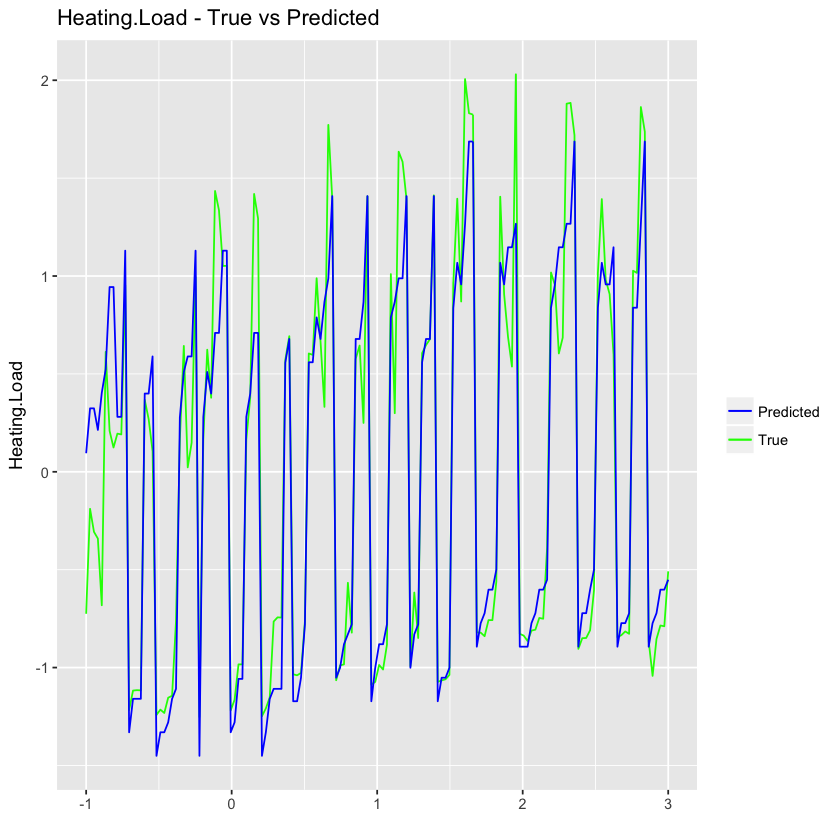

In [22]:
ggplot() +
  geom_line(aes(x = seq(-1,3,length.out = 150), y = test_set$Heating.Load, color = 'True')) +
  geom_line(aes(x = seq(-1,3,length.out = 150), y = y_pred,color = 'Predicted'))+
  scale_color_manual(name=' ',values=c(True ='green', Predicted ='blue'))+
  ggtitle('Heating.Load - True vs Predicted') +
  xlab(' ') +
  ylab('Heating.Load')

The predictions seem to be closely following the true values. Lets now proceed to predicting the Cooling.Load as functions of other variables. We just need to repeat the above steps for regressor2.

## Fitting a Linear Regression - regressor2

In [23]:
#splitting to training and test sets
set.seed(123)
split <- sample.split(Energyefficiency$Cooling.Load, SplitRatio = 0.8)
training_set <- subset(Energyefficiency, split == TRUE)
test_set <- subset(Energyefficiency, split == FALSE)

In [24]:
#Feature Scaling
training_set = data.frame(scale(training_set))
test_set = data.frame(scale(test_set))

In [25]:
#Fitting Linear Regression to the dataset
Linear_regressor2 <- lm(formula = Cooling.Load ~Relative.Compactness + Surface.Area + Wall.Area +
                   Roof.Area + Overall.Height + Orientation + Glazing.Area + Glazing.Area.Distribution,
                 data = training_set)

In [26]:
summary(Linear_regressor2)


Call:
lm(formula = Cooling.Load ~ Relative.Compactness + Surface.Area + 
    Wall.Area + Roof.Area + Overall.Height + Orientation + Glazing.Area + 
    Glazing.Area.Distribution, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9515 -0.1844 -0.0267  0.1636  1.1883 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -3.277e-16  1.411e-02   0.000    1.000    
Relative.Compactness      -8.185e-01  1.466e-01  -5.583 3.61e-08 ***
Surface.Area              -8.893e-01  2.031e-01  -4.378 1.42e-05 ***
Wall.Area                  2.272e-01  3.830e-02   5.931 5.12e-09 ***
Roof.Area                         NA         NA      NA       NA    
Overall.Height             7.544e-01  7.925e-02   9.520  < 2e-16 ***
Orientation                1.775e-02  1.414e-02   1.256    0.210    
Glazing.Area               1.966e-01  1.429e-02  13.759  < 2e-16 ***
Glazing.Area.Distribution -9

From the abve statistics, we remove insignificant variables Roof.Area, Orientation and Glazing.Area.Distribution and rebuild the model

In [27]:
Linear_regressor2 <- lm(formula = Cooling.Load ~Relative.Compactness + Surface.Area + Wall.Area 
                  + Overall.Height + Glazing.Area,
                 data = training_set)
summary(Linear_regressor2)


Call:
lm(formula = Cooling.Load ~ Relative.Compactness + Surface.Area + 
    Wall.Area + Overall.Height + Glazing.Area, data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92836 -0.17823 -0.03176  0.15877  1.21718 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -3.209e-16  1.411e-02   0.000        1    
Relative.Compactness -8.198e-01  1.465e-01  -5.595 3.38e-08 ***
Surface.Area         -8.907e-01  2.030e-01  -4.387 1.36e-05 ***
Wall.Area             2.272e-01  3.829e-02   5.934 5.04e-09 ***
Overall.Height        7.550e-01  7.920e-02   9.534  < 2e-16 ***
Glazing.Area          1.956e-01  1.413e-02  13.842  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3451 on 592 degrees of freedom
Multiple R-squared:  0.8819,	Adjusted R-squared:  0.8809 
F-statistic: 884.4 on 5 and 592 DF,  p-value: < 2.2e-16


In [28]:
# Predicting the Test set results and evaluate the Mean Squared Error
y_pred = predict(Linear_regressor2, newdata = test_set)
mse2 <- mean((test_set$Cooling.Load - y_pred)^2)
mse2

[1] 0.1171717

Error rate is lower!. R-squared values are also good. Now visualize True vs Predicted values

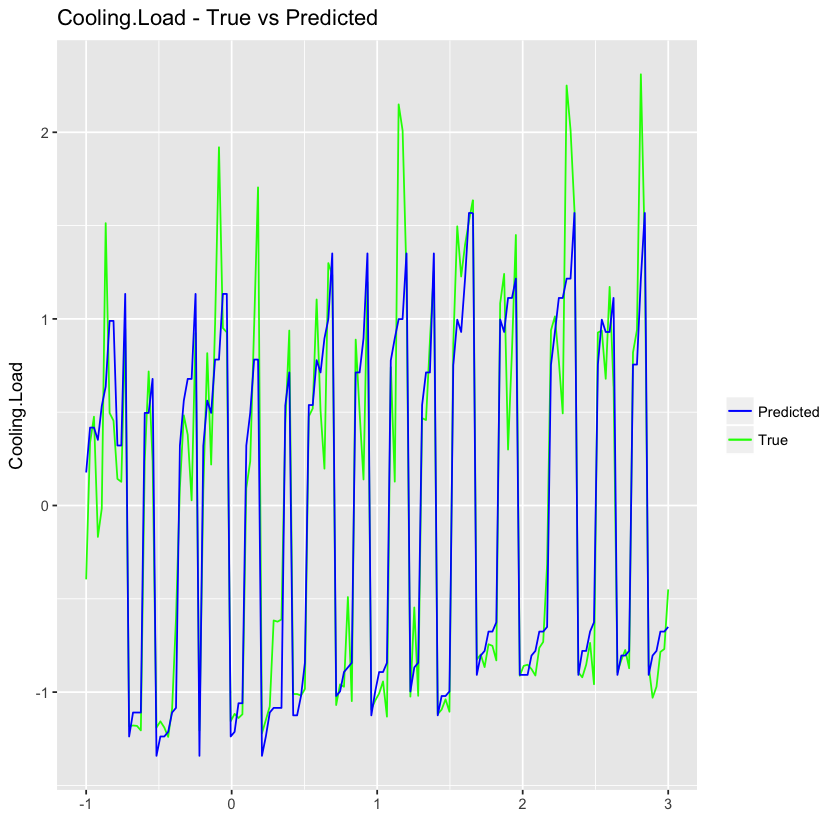

In [29]:
#Here we create an x sequence of the size of Heating.Load in the range of the same (-1 to 3)
ggplot() +
  geom_line(aes(x = seq(-1,3,length.out = 150), y = test_set$Cooling.Load, color = 'True')) +
  geom_line(aes(x = seq(-1,3,length.out = 150), y = y_pred,color = 'Predicted'))+
  scale_color_manual(name=' ',values=c(True ='green', Predicted ='blue'))+
  ggtitle('Cooling.Load - True vs Predicted') +
  xlab(' ') +
  ylab('Cooling.Load')

The Linear Regression models which we created seem to be good predictors of Heating.Load and Cooling.Load i.e. the model can capture most of the features of the Energyefficiency dataset. 

Lets now create a few other types of regression models commonly used and see how it does impact the error statistics :
1. Decision Tree Regression
1. KNN Regression
2. RandomForests Regression

In [30]:
#Lets begin by importing libraries
#install.packages("FNN")
library(FNN)
library(rpart)
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [31]:
#Splitting to training and test sets
set.seed(123)
split <- sample.split(Energyefficiency$Heating.Load, SplitRatio = 0.8)
training_set <- subset(Energyefficiency, split == TRUE)
test_set <- subset(Energyefficiency, split == FALSE)

In [32]:
# Fitting Decision Tree Regression to the dataset
dec_tree_regressor = rpart(formula = Heating.Load ~Relative.Compactness + Surface.Area + Wall.Area +
                           Overall.Height + Orientation + Glazing.Area,
                  data = training_set,
                  control = rpart.control(minsplit = 1))

In [33]:
# Predicting with Decision Tree Regression
y_pred = predict(dec_tree_regressor, newdata = test_set)

In [34]:
#Evaluating MSE on test set
dec_tree_mse1 <- mean((test_set$Heating.Load - y_pred)^2)
dec_tree_mse1

[1] 96.71112

The results for Decision Tree regression are not promising. The error rate is too large. Lets now try implementing another algorithm, 

In [35]:
# Fitting KNN Regression to the dataset
knn_regressor = knn.reg(train = training_set, test = test_set, y =training_set$Heating.Load)

In [36]:
# Predicting with KNN Regression
#Evaluating MSE on test set
knn_mse1 <- mean((test_set$Heating.Load - knn_regressor$pred)^2)
knn_mse1

[1] 0.4951953

MSE results are very good for KNN Regression ! Lets proceed to Random Forests, 

In [37]:
# Fitting Random Forest Regression to the dataset
set.seed(1234)
randForest_regressor = randomForest(formula = Heating.Load ~Relative.Compactness + Surface.Area + Wall.Area +
                          Overall.Height + Glazing.Area + Glazing.Area.Distribution,
                          data = training_set,         
                          ntree = 500)

In [38]:
# Predicting with Random Forests Regression
y_pred = predict(randForest_regressor, newdata = test_set)

In [39]:
rf_mse1 <- mean((test_set$Heating.Load - y_pred)^2)
rf_mse1

[1] 0.851757

The error rate is good !. Random forests is another good fit to the data and performs well on the test set too !.

## Concluding Remarks
1. The Linear Regression algorithm can make good predictions for the Heating Load and Cooling Load, the output    parameters of the dataset, when evaluated on a test set.
2. The methods KNN regression and the Random Forests regression do perform equaly good, giving out lower test MSE's.

Lets print a summary for Heating Load predictions with the methods adopted :

In [40]:
Method <- c("Linear Regression", "Decision Tree Regression","KNN Regerssion", "Random Forests Regression")
MSE  <- c(Linear_mse1,dec_tree_mse1,knn_mse1,rf_mse1)
data.frame(Method,MSE)

Method,MSE
Linear Regression,0.09840992
Decision Tree Regression,96.71112219
KNN Regerssion,0.49519533
Random Forests Regression,0.85175704
